# Why people leave their current positions? _[Dataset](https://www.kaggle.com/ludobenistant/hr-analytics)_
# What can employers do to keep their employees stay?

Looking at this interesting HR dataset and find out some interesting results from here.

# Featues:
   1. Employee satisfaction level;
   2. Last evaluation;
   3. Number of projects;
   4. Average monthly hours;
   5. Time spend at the company;
   6. Whether they have had a work accident;
   7. Whether they have had a promotion in the last 5 years;
   8. Department;
   9. Salary;
   10. Whether the employee has left

# Questions to explore through EDA are:
   1. Are there missing data?
   2. Are there any correlations between variables?
   3. Which feature(s) can provide more valuable information?

In [8]:
#import necessary packages and load dataset
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#Read data
data = pd.read_csv('HR_comma_sep.csv') #Change the path to your path-to-data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Take a brief look at HR data
   1. 3 continuous variables (satisfaction level, last evaluation, average monthly hours);
   2. 2 string-value variables (sales, salary).
   
#  Are there missing data?
   1. Check if there are missing data;
   2. Convert string-value variables to numeric-value categorical variables;
   3. Because this is a classification problem, it is better to convert continuous variables to categorical ones.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Luckily, no missing data exist.

Next, because most models are not able to deal with string-value variables, we need to convert those variables to numeric-value variables.

In [23]:
data['sales'].unique(),data['salary'].unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [4]:
#Define functions to make our code more compact and easier to read
def rewriteData(data):
    data['sales'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
    data['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)
    
def regroupCol(data, column):
    data['new_column'] = pd.cut(data[column], 3) 
    return data[['new_column', 'left']].groupby(['new_column']).mean()

def categorize(data, column, a, b, c):
    data.loc[data[column] <= a, column] = 0
    data.loc[(data[column] > a) & (data[column] < b), column] = 1
    data.loc[(data[column] > b) & (data[column] < c), column] = 2
    data.drop(['new_column'], axis = 1, inplace = True)
    print("Compeleted Transformation!")
    
def kdeplot(data, column):
    g = sns.FacetGrid(data, hue="left",aspect=4)
    g.map(sns.kdeplot,column,shade= True);
    g.set(xlim=(0, data[column].max()));
    g.add_legend()
    
def boxplot(data, column):
    g = sns.FacetGrid(data, col = 'left')
    g.map(sns.boxplot, column);
    
def barplot(data, column):
    sns.barplot(x = column, y = 'left', data = data)
    sns.plt.title('Left over {} (barplot)'.format(column))
    
def factorplot(data, column):
    sns.factorplot(x = column, y = 'left', data = data, size = 5)
    sns.plt.title('Left over {} (factorplot)'.format(column))
    
def corMatrix(data):
    corr = data.corr()
    corr = (corr)
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
    sns.plt.title('Heatmap of Correlation Matrix')
    return(corr)

# Are there any correlations between variables?

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


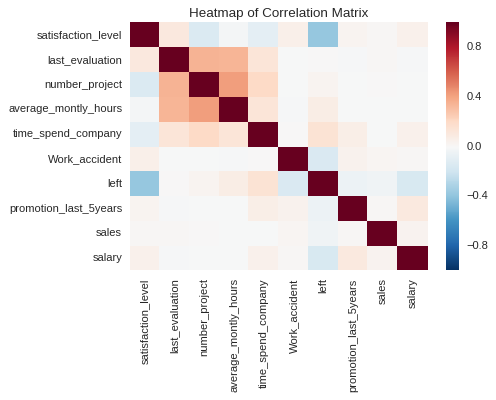

In [65]:
rewriteData(data)
corMatrix(data)

In [6]:
corr_left = pd.DataFrame(corr['left'].drop('left'))
corr_left.sort_values(by = 'left', ascending = False)

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
sales,-0.043814
promotion_last_5years,-0.061788
Work_accident,-0.154622
salary,-0.157898
satisfaction_level,-0.388375


### Notice
   The correlation matrix (pearson correlation values) only shows linear relationships between variables, which means it cannot represent any non-linear relationships. However, non-linear relationships do exist in most dataset.
   
   Be careful to make any further ceonclusion using correlation matrix!
   
   Also for correlation matrix, it's more important to see relationships between variables rather than between predictors and target.

# Which feature(s) can provide more valuable information?

The first variable we are exploring is work efficiency. I simply divide average monthly hours by number of projects. 

The feature will represent average hours the employee take to complete a project.

### Feature: avg_hour_project

Distribution:

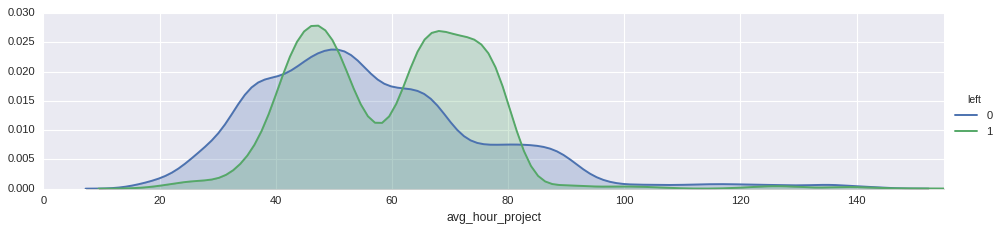

In [9]:
data['avg_hour_project'] = (data['average_montly_hours']) /data['number_project']
#regroupCol(data, 'avg_hour_project')
kdeplot(data, 'avg_hour_project')

In [7]:
regroupCol(data, 'avg_hour_project')

,left
new_column,
"(16.0278, 62.444]",0.186359
"(62.444, 108.722]",0.340725
"(108.722, 155]",0.098940


### Labeling each group

In [28]:
categorize(data, 'avg_hour_project', 62.444, 108.722, 155)

Compeleted Transformation!


### Feature: average_montly_hours

Distribution:

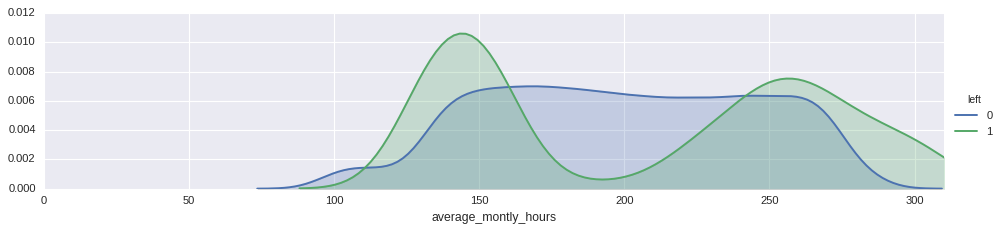

In [10]:
kdeplot(data, 'average_montly_hours')

### About average_montly_hours:
  1. People who left are splited into two groups: with lower average monthly hours and with higher average monthly hours;
  2. People who did not left have relatively constant pattern of average monthly hours.

The reason behind this could be various:

    For people who are with less average_montly_hours may don't have enough work to do and then be frustrated; and for those who are with more a-m-h may feel they are over-exploited.

    Also we can assume that for the first group, they left because are not hard-working and then have to leave; while for the second one, they left because they are good enough to get a better job.

Before we move on, let's convert it to categorical first.

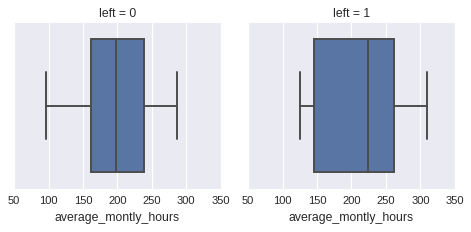

In [11]:
#Boxplot, check outliers
boxplot(data, 'average_montly_hours')

In [12]:
regroupCol(data, 'average_montly_hours')

,left
new_column,
"(95.786, 167.333]",0.326489
"(167.333, 238.667]",0.070913
"(238.667, 310]",0.355242


In [13]:
categorize(data, 'average_montly_hours', 167.333, 238.667, 310)

Compeleted Transformation!


### Feature: satisfaction_level

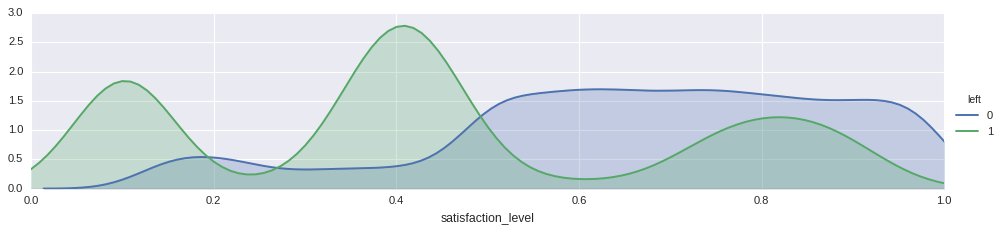

In [14]:
#satisfaction_level
kdeplot(data, 'satisfaction_level')

### About satisfaction_level:
   1. People who left have avragely lower satisfaction level;
   2. People who did not leave are constantly satisfy with their positions;
   3. There's one interesting group: People who left but with relatively high satisfaction level. 

The reason why they left could be really interesting:
   
   For those who are not satisfied with their positions (less than 0.5), the reason why they leave could be straightforward to us;
   While for those who are with higher satisfaction level, the reason for their leaving are not as important as the fact that the company may not be able to keep them stay. We'll talk about this in detail later (combine with other variables).


In [15]:
regroupCol(data, 'satisfaction_level')

,left
new_column,
"(0.0891, 0.393]",0.537221
"(0.393, 0.697]",0.190288
"(0.697, 1]",0.145010


In [16]:
categorize(data, 'satisfaction_level', 0.393, 0.697, 1)

Compeleted Transformation!


### Feature: last_evaluation

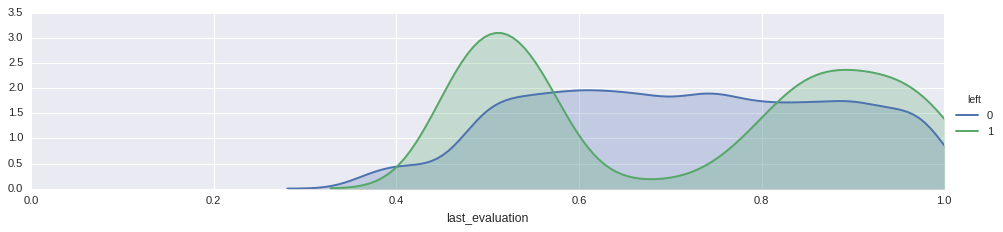

In [15]:
#last_evaluation
kdeplot(data, 'last_evaluation')

### About last_evaluation
  For people who left, they are splited into two main groups:
  1. People whose evaluation is relatively low;
  2. People whose last evaluation is very high but still left.
  
For people who did not leave, they are in a constantly distributed range of last_evaluation.

In [17]:
regroupCol(data, 'last_evaluation')

,left
new_column,
"(0.359, 0.573]",0.374003
"(0.573, 0.787]",0.040160
"(0.787, 1]",0.298612


In [18]:
categorize(data, 'last_evaluation', 0.573, 0.787, 1)

Compeleted Transformation!


### Feature: time_spend_company

The way of visualizing categorical variables could be different from that of continuous ones.

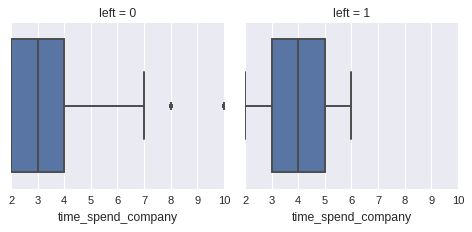

In [16]:
#Boxplot, to see if there are outliers
boxplot(data, 'time_spend_company')

In [17]:
#outliers do exists, drop them off
dropdata = data[data['time_spend_company'] >= 8]
data.drop(dropdata.index, inplace = True)

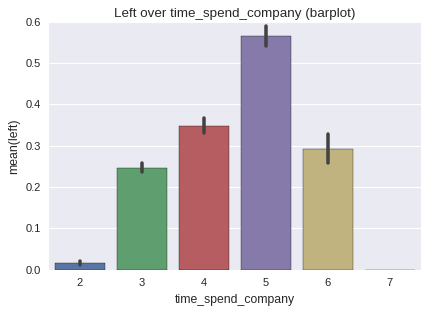

In [18]:
barplot(data, 'time_spend_company')

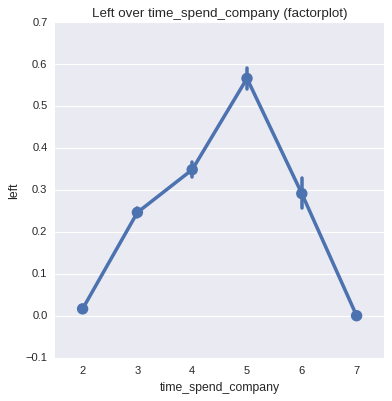

In [19]:
factorplot(data, 'time_spend_company')

### Above plots already do provide much information for us:
   1. For people who spend <= 5 years at a company, the more years they spend, the more likely they leave;
   2. For people who spend > 5 years, the more they spend, the less likely they leave.

### Questions raised from time_spend_company:
  1. Why 5 years be a boundary?
  2. Why people are way more likely to leave if they spend 5 years at a company?
  3. For those who spend 4-6 years, is it possible to keep them stay? (Because they have already spend a relatively long time at certain company, they must have a STRONG reason for leaving)

### Feature: number_project

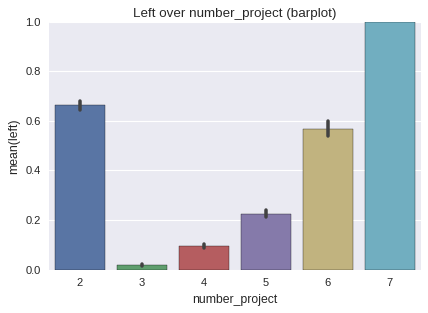

In [20]:
#number_project
barplot(data, 'number_project')

Number of project could be an important thing evaluating a employee, but we need to put it together with other variables to find some meanningfu results. We'll do this later.

### Feature: salary

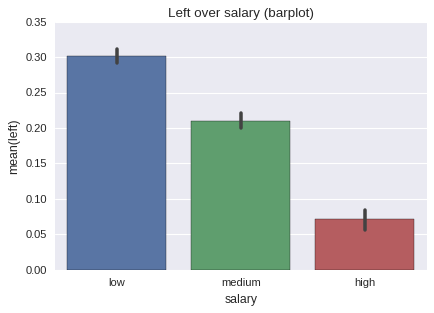

In [21]:
#salary
barplot(data, 'salary')

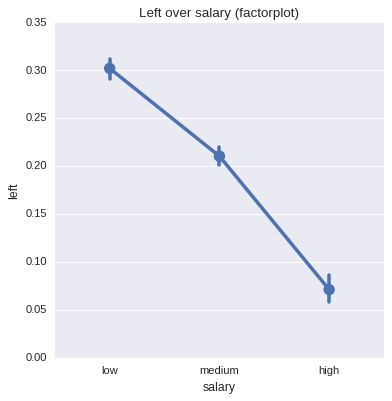

In [22]:
factorplot(data, 'salary')

The higher the salary, the less possible to leave. This result is pretty straitforward.

### Feature: promotion_last_5years

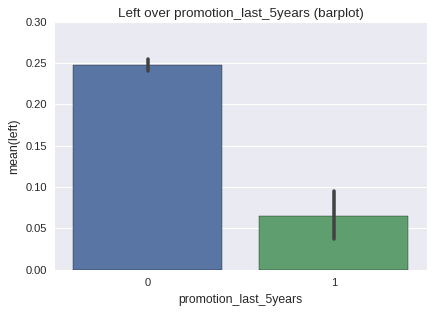

In [23]:
#promotion_last_5years
barplot(data, 'promotion_last_5years')

If they're promoted in last 5 years, they are less likely to leave. (Also very straightforward)

However, since it's name is "promotion_last_5years", it seems not fair to use this to predict people whose work experience are less than 5 years.

### Feature: sales --> position

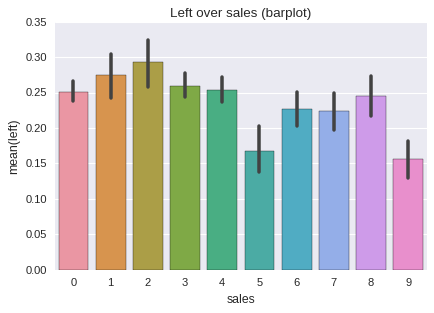

In [51]:
#Sales
barplot(data, 'sales')

It seems "sales"(means "positions") is not a good estimator.

### Feature: work_accident

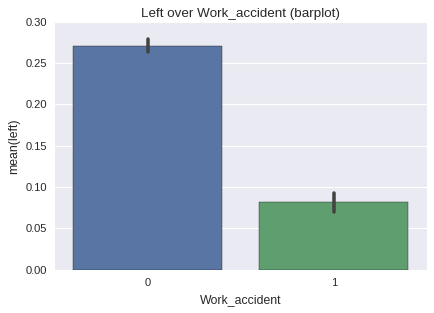

In [52]:
barplot(data, 'Work_accident')

The trick here is: people who do not have work accident seems more likely to leave than those who do have work accident. That's kind of confusing at this time. So detailed analysis are needed.